In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline


In [18]:
df = pd.read_excel('C:/Users/AnupamaRatha/Desktop/Study/Data/Online Retail/Online Retail.xlsx')

In [19]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
#1- What is the total amount of purchases for each customer and who is the most and less customer has paid.

df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [21]:
# Calculate the total sales of each product
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [22]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

#1- What is the total amount of purchases for each customer and who is the most and less customer has paid.


In [28]:
# Show top 10 customers, max and min amounts paid   
res_df = new_df.groupby(['CustomerID']).sum()
res_df.sort_values('TotalAmount',ascending=False,inplace=True)

final_df = res_df[(res_df['Quantity'] > 0) & (res_df['TotalAmount'] > 0)]


In [29]:
res_df .head(5)

,Quantity,TotalAmount
CustomerID,,
14646.0,196719,279489.02
18102.0,64122,256438.49
17450.0,69029,187482.17
14911.0,77180,132572.62
12415.0,77242,123725.45


In [31]:
print('customer Id {} who paid the maximum amount {}'.format(int(final_df['TotalAmount'].argmax()),final_df['TotalAmount'].max()))
print('customer Id {} who paid the minimum amount {}'.format(int(final_df['TotalAmount'].argmin()),final_df['TotalAmount'].min()))

final_df.head(5)

customer Id 14646 who paid the maximum amount 279489.0199999999
customer Id 16446 who paid the minimum amount 2.8999999999941792


C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  


,Quantity,TotalAmount
CustomerID,,
14646.0,196719,279489.02
18102.0,64122,256438.49
17450.0,69029,187482.17
14911.0,77180,132572.62
12415.0,77242,123725.45


Total sales at each country, how many quantites sold at each country 

In [34]:
country_df = new_df.groupby(['Country']).sum()
country_df.sort_values('TotalAmount',ascending=False,inplace=True)
country_df.drop('CustomerID',axis=1,inplace=True)
country_df.head()

,Quantity,TotalAmount
Country,,
United Kingdom,4263829,8.187806e+06
Netherlands,200128,2.846615e+05
EIRE,142637,2.632768e+05
Germany,117448,2.216982e+05
France,110480,1.974039e+05




How many products have been bought by each customer and who is the customer who has bought the highest and the least number of products.

In [38]:
#cus_df = new_df.groupby(['CustomerID']).sum()
#cus_df.sort_values('Quantity',ascending=False,inplace=True)
#cus_df.head()

# show the min and max quantites has sold. 
print('The minimum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].min(),final_df['Quantity'].argmin()))
print('The maximum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].max(),final_df['Quantity'].argmax()))
new_df.groupby('Country').mean()


The minimum number of products has been bought is 1 by customer id 17846.0 
The maximum number of products has been bought is 196719 by customer id 14646.0 


C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys


,CustomerID,Quantity,TotalAmount
Country,,,
Australia,12464.656076,66.444003,108.877895
Austria,12521.451372,12.037406,25.322494
Bahrain,12354.529412,13.684211,28.863158
Belgium,12430.298695,11.189947,19.773301
Brazil,12769.000000,11.125000,35.737500
Canada,17321.079470,18.298013,24.280662
Channel Islands,14888.151715,12.505277,26.499063
Cyprus,12404.951768,10.155949,20.813971
Czech Republic,12781.000000,19.733333,23.590667


In [37]:
print('customer Id {} who have the maximum Quantity {}'.format(int(final_df['Quantity'].argmax()),final_df['Quantity'].max()))

customer Id 14646 who have the maximum Quantity 196719


C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Top 10 customers sales overall countries sorted by totalamount

In [40]:
avg_quan = new_df[['Quantity','TotalAmount','Country','InvoiceNo','CustomerID']]
avg_sum = avg_quan.groupby(['Country','CustomerID']).sum() 
avg_sum.sort_values('TotalAmount',ascending=False).head(10)

Quantity  TotalAmount
Country        CustomerID                       
Netherlands    14646.0       196719    279489.02
United Kingdom 18102.0        64122    256438.49
               17450.0        69029    187482.17
EIRE           14911.0        77180    132572.62
Australia      12415.0        77242    123725.45
EIRE           14156.0        57025    113384.14
United Kingdom 17511.0        63012     88125.38
               16684.0        49390     65892.08
               13694.0        61803     62653.10
               15311.0        37720     59419.34

 average of paid amount by each customer at each country ordered by number of invoices.

In [57]:
avg_cus = df[['Quantity','TotalAmount','Country','InvoiceNo']].copy()

x = avg_cus.groupby(['Country','InvoiceNo']).sum()

x['Ones']=1
y = x.groupby('Country').sum()
y['AVG'] = y['TotalAmount'] / y['Ones']
y.sort_values(['Ones','AVG'],ascending=False,inplace=True)
y.head()

,Quantity,TotalAmount,Ones,AVG
Country,,,,
United Kingdom,4263829,8187806.364,23494,348.506272
Germany,117448,221698.210,603,367.658723
France,110480,197403.900,461,428.208026
EIRE,142637,263276.820,360,731.324500
Belgium,23152,40910.960,119,343.789580


In [52]:
## Average of amount paid by the customers overall countries
y['TotalAmount'].sum() / y['Quantity'].sum()

1.883095158651216

NameError: name 'Text' is not defined

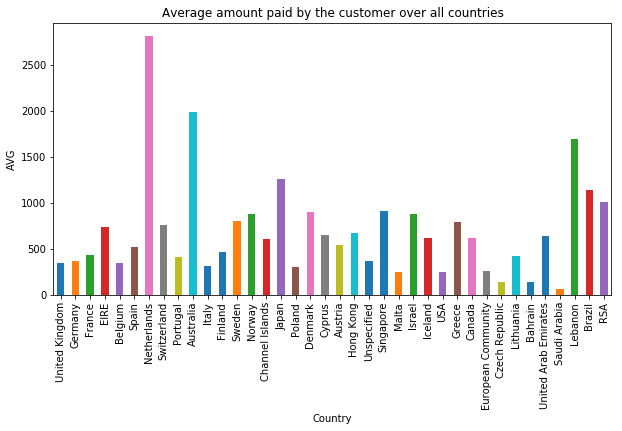

In [58]:
y['AVG'].plot(kind='bar',figsize=(10,5),title='Average amount paid by the customer over all countries')
plt.ylabel('AVG')
plt.xlabel('Country')
Text(0.5,0,'Country')